In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.metrics import plot_confusion_matrix,confusion_matrix



In [225]:
data=pd.read_csv('processed.cleveland.csv')
data

,Age,Sex,CP,TrestBPS,Chol,FBS,RestECG,Thalach,Exang,OldPeak,Slope,CA,Thal,HeartDiesease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


<h2> Attributes</h2>
<p>Age: age in years</p>
<p>Sex: sex (1 = male; 0 = female)</p>
<p>CP: chest pain type</p>
<p>-- Value 1: typical angina</p>
<p>-- Value 2: atypical angina</p>
<p>-- Value 3: non-anginal pain</p>
<p>-- Value 4: asymptomatic</p>
<p>Chol: serum cholestoral in mg/dl</p>
<p>TrestBPS: resting blood pressure (in mm Hg on admission to the hospital)</p>
<p>FBS: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</p>
<p>RestECG: resting electrocardiographic results</p>
<p>-- Value 0: normal</p>
<p>-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)</p>
<p>-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria</p>
<p>Exang: exercise induced angina (1 = yes; 0 = no)</p>
<p>Thalach: maximum heart rate achieved</p>
<p>OldPeak = ST depression induced by exercise relative to rest</p>
<p>Slope: the slope of the peak exercise ST segment</p>
<p>-- Value 1: upsloping</p>
<p>-- Value 2: flat</p>
<p>-- Value 3: downsloping</p>
<p>CA: number of major vessels (0-3) colored by flourosopy</p>
<p>Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect</p>
<p>HeartDisease: 1= True, 0-False</p>

In [226]:
for i in data.columns:
    if data[i].isnull().sum()>0:
        print(i)
else:
    print("Ended")

Ended


In [227]:
data.dtypes

Age              float64
Sex              float64
CP               float64
TrestBPS         float64
Chol             float64
FBS              float64
RestECG          float64
Thalach          float64
Exang            float64
OldPeak          float64
Slope            float64
CA                object
Thal              object
HeartDiesease      int64
dtype: object

In [228]:
data['CA'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [229]:
data['Thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [230]:
data.shape

(303, 14)

In [231]:
len(data[(data['CA']=='?') | (data['Thal']=='?')])

6

In [232]:
data.drop(data[(data['CA']=='?') | (data['Thal']=='?')].index,axis=0,inplace=True)
data.shape

(297, 14)

In [233]:
data['CA'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [234]:
Target=data['HeartDiesease'].copy()
data.drop(['HeartDiesease'],axis=1,inplace=True)
data

,Age,Sex,CP,TrestBPS,Chol,FBS,RestECG,Thalach,Exang,OldPeak,Slope,CA,Thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [235]:
data=pd.get_dummies(data,columns=['CP','RestECG','Slope','Thal'])
data

,Age,Sex,TrestBPS,Chol,FBS,Thalach,Exang,OldPeak,CA,CP_1.0,...,CP_4.0,RestECG_0.0,RestECG_1.0,RestECG_2.0,Slope_1.0,Slope_2.0,Slope_3.0,Thal_3.0,Thal_6.0,Thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,140.0,241.0,0.0,123.0,1.0,0.2,0.0,0,...,1,1,0,0,0,1,0,0,0,1
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,1,...,0,1,0,0,0,1,0,0,0,1
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,2.0,0,...,1,1,0,0,0,1,0,0,0,1
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,0,...,1,1,0,0,0,1,0,0,0,1


In [236]:
Target[(Target>0)]=1
Target.value_counts()

0    160
1    137
Name: HeartDiesease, dtype: int64

In [237]:
XTrain,XTest,YTrain,YTest=train_test_split(data,Target,test_size=0.2,random_state=42)
XTest.shape

(60, 22)

In [238]:
Model=DecisionTreeClassifier(random_state=42)
Model.fit(XTrain,YTrain)

DecisionTreeClassifier(random_state=42)

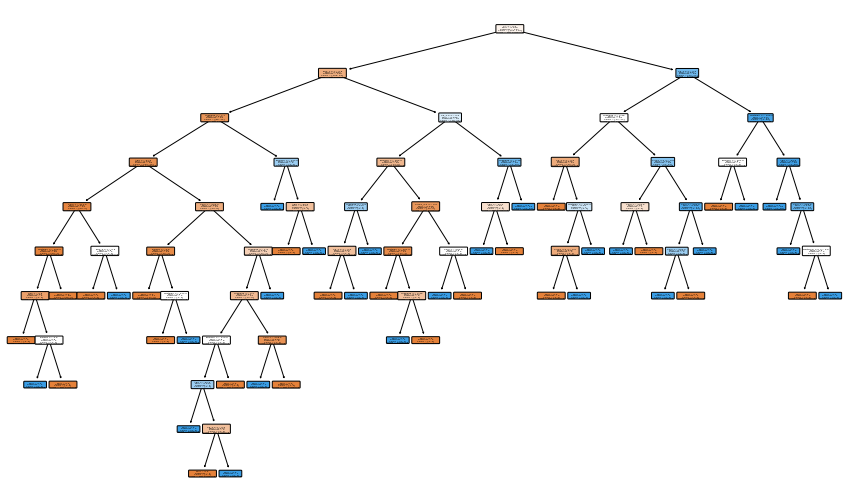

In [239]:
plt.figure(figsize=(15,9))
plot_tree(Model,rounded=True,filled=True,class_names=['Not Suffering','Suffering'],feature_names=data.columns);


In [240]:
Model.score(XTest,YTest)

0.8166666666666667

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


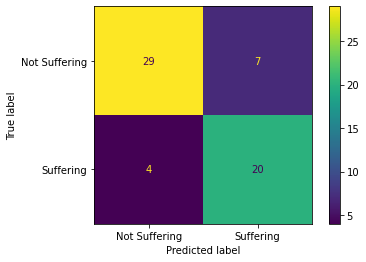

In [241]:
plot_confusion_matrix(Model,XTest,YTest,display_labels=['Not Suffering','Suffering'])

In [242]:
path=Model.cost_complexity_pruning_path(XTrain,YTrain)
CcpAllAlphas=path.ccp_alphas
CcpAlphas=CcpAllAlphas[:-1]

TempModels=[]
for alpha in CcpAlphas:
    TempModel=DecisionTreeClassifier(random_state=42,ccp_alpha=alpha)
    TempModel.fit(XTrain,YTrain)
    TempModels.append(TempModel)

In [243]:
TrainScore=[model.score(XTrain,YTrain) for model in TempModels]
TestScore=[model.score(XTest,YTest) for model in TempModels]

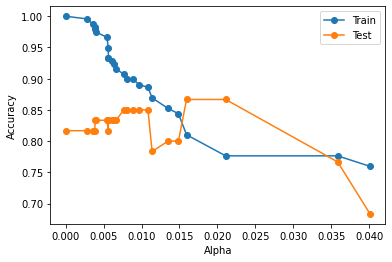

In [244]:
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.plot(CcpAlphas,TrainScore,marker='o',label='Train')
plt.plot(CcpAlphas,TestScore,marker='o',label='Test')
plt.legend()
plt.show()

In [245]:
TempModel=DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)
TempModel.fit(XTrain,YTrain)
TempModel.score(XTest,YTest)
#Using 10 fold cross validation to check that weather this alpha really performs better
# scores=cross_val_score(TempModel,data,Target,cv=5)
# plt.plot([1,2,3,4,5],scores,linestyle='--')
# plt.xlabel('Tree')
# plt.ylabel('Accuracy')
# plt.show()

0.8666666666666667

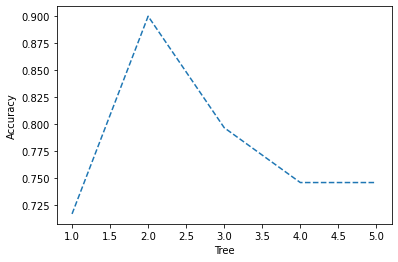

In [246]:
TempModel=DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

#Using 10 fold cross validation to check that weather this alpha really performs better
scores=cross_val_score(TempModel,data,Target,cv=5)
plt.plot([1,2,3,4,5],scores,linestyle='--')
plt.xlabel('Tree')
plt.ylabel('Accuracy')
plt.show()

<p> As we can see there have been a lot of variation i.e alpha is sensitive to the datasets.</p>

<AxesSubplot:xlabel='Alpha'>

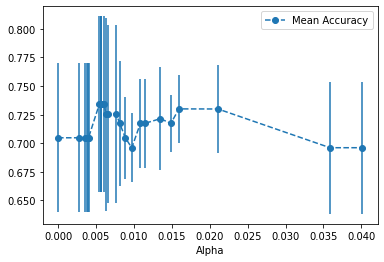

In [247]:
CrossValidatedData=[]

for alpha in CcpAlphas:
    TempModel=DecisionTreeClassifier(random_state=42,ccp_alpha=alpha)
    scores=cross_val_score(TempModel,XTrain,YTrain,cv=5)
    CrossValidatedData.append([alpha,np.mean(scores),np.std(scores)])

df=pd.DataFrame(CrossValidatedData,columns=['Alpha','Mean Accuracy','Std'])
df.plot('Alpha','Mean Accuracy',yerr='Std',marker='o',linestyle='--')
    

In [257]:
IdealAlpha=float(CcpAlphas[(CcpAlphas<0.017) & (CcpAlphas>0.015)])
IdealAlpha

0.01593999062353492

In [251]:
# CrossValidatedData=[]

# for alpha in CcpAlphas:
#     TempModel=DecisionTreeClassifier(random_state=42,ccp_alpha=alpha)
#     scores=cross_val_score(TempModel,data,Target,cv=5)
#     CrossValidatedData.append([alpha,np.mean(scores),np.std(scores)])

# df=pd.DataFrame(CrossValidatedData,columns=['Alpha','Mean Accuracy','Std'])
# df.plot('Alpha','Mean Accuracy',yerr='Std',marker='o',linestyle='--')

In [252]:
# IdealAlpha=float(CcpAlphas[(CcpAlphas<0.023) & (CcpAlphas>0.02)])
# IdealAlpha

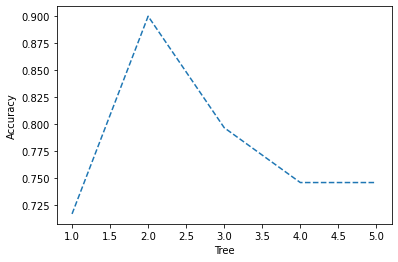

In [253]:
TempModel=DecisionTreeClassifier(random_state=42, ccp_alpha=IdealAlpha)

#Using 10 fold cross validation to check that weather this alpha really performs better
scores=cross_val_score(TempModel,data,Target,cv=5)
plt.plot([1,2,3,4,5],scores,linestyle='--')
plt.xlabel('Tree')
plt.ylabel('Accuracy')
plt.show()

<p> It is not varying that much as our Previous guessed alpha model was doing</p>

In [254]:
IdealModel=DecisionTreeClassifier(random_state=42,ccp_alpha=IdealAlpha)
IdealModel.fit(XTrain,YTrain)

IdealModel.score(XTest,YTest)

0.8666666666666667

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


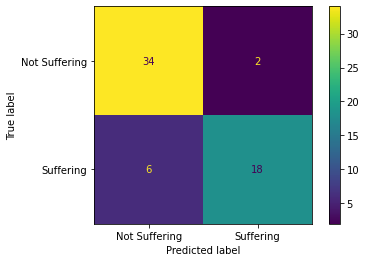

In [255]:
plot_confusion_matrix(IdealModel,XTest,YTest,display_labels=['Not Suffering','Suffering'])

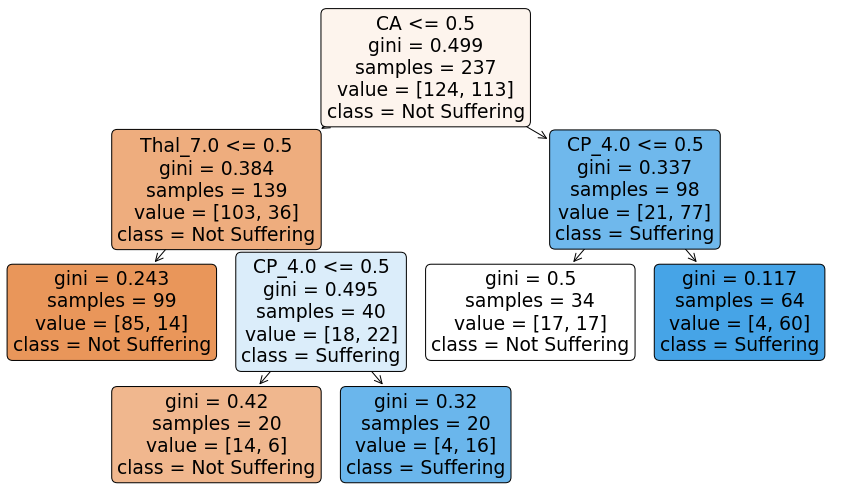

In [256]:
plt.figure(figsize=(15,9))
plot_tree(IdealModel,rounded=True,filled=True,class_names=['Not Suffering','Suffering'],feature_names=data.columns);

<p>I also tried the whole thing by doing cross validation on whole dataset and got 0.021097046413502116 alpha which was working better on test dataset but not on whole dataset, this current Model proves to be better to minimize the variance.</p>